<a href="https://colab.research.google.com/github/vijayasri-manda/Data-Science/blob/main/SentimentAnalysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
%matplotlib inline
from subprocess import check_output

In [85]:
data=pd.read_csv('/content/sentiment_analysis.csv')

In [86]:
data

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram
...,...,...,...,...,...,...,...
494,2015,10,18,night,"According to , a quarter of families under six...",negative,Twitter
495,2021,2,25,morning,the plan to not spend money is not going well,negative,Instagram
496,2022,5,30,noon,uploading all my bamboozle pictures of facebook,neutral,Facebook
497,2018,8,10,night,congratulations ! you guys finish a month ear...,positive,Twitter


In [87]:
data.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [88]:
data.isnull().sum()

,0
Year,0
Month,0
Day,0
Time of Tweet,0
text,0
sentiment,0
Platform,0


In [89]:
data=data[['text','sentiment']]

In [90]:
data.shape

(499, 2)

In [91]:
data['sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [92]:
train,test=train_test_split(data,test_size=0.2,random_state=42)

In [93]:
train=train[train.sentiment!='neutral']

In [94]:
train

,text,sentiment
56,"I have bad headech, what I need to do now",negative
227,happy mother`s day to all the mothers in the w...,positive
280,Getting ready for week Its too nice today to ...,positive
220,"Errors are red but my life is blue, I love ros...",positive
448,I don`t want to sit at home on prom night. Som...,negative
...,...,...
498,"actually, I wish I was back in Tahoe. I miss...",negative
188,"Felt like ****, behaved like my son; ate to co...",negative
348,I only do computers. Am hopeless at everythin...,negative
435,No waterfront anymore faccia luna and claren...,negative


In [95]:
train['sentiment'].unique()

array(['negative', 'positive'], dtype=object)

In [96]:
train


,text,sentiment
56,"I have bad headech, what I need to do now",negative
227,happy mother`s day to all the mothers in the w...,positive
280,Getting ready for week Its too nice today to ...,positive
220,"Errors are red but my life is blue, I love ros...",positive
448,I don`t want to sit at home on prom night. Som...,negative
...,...,...
498,"actually, I wish I was back in Tahoe. I miss...",negative
188,"Felt like ****, behaved like my son; ate to co...",negative
348,I only do computers. Am hopeless at everythin...,negative
435,No waterfront anymore faccia luna and claren...,negative


In [97]:
train_positive=train[train['sentiment']=='positive']
train_negative=train[train['sentiment']=='negative']
train_positive=train_positive['text']
train_negative=train_negative['text']

In [98]:
train_positive.shape

(132,)

In [99]:
train_positive

,text
227,happy mother`s day to all the mothers in the w...
280,Getting ready for week Its too nice today to ...
220,"Errors are red but my life is blue, I love ros..."
422,a mouth for sure
25,"Its amazing game, I playing everyday"
...,...
99,That`s very funny. Cute kids.
87,"Playing with kids, its amazing"
458,Wow what a beautiful picture... and by the ...
466,Off to Woolsery this morning to (hopefully) se...


In [100]:
train_negative

,text
56,"I have bad headech, what I need to do now"
448,I don`t want to sit at home on prom night. Som...
376,aww I miss driving down elmwood
154,I'm studying in psychology
403,I wish I could get my nails done stupid job
...,...
498,"actually, I wish I was back in Tahoe. I miss..."
188,"Felt like ****, behaved like my son; ate to co..."
348,I only do computers. Am hopeless at everythin...
435,No waterfront anymore faccia luna and claren...


In [101]:
train_negative.shape

(98,)

In [102]:
train.shape

(230, 2)

In [103]:
test.shape

(100, 2)

Positive words


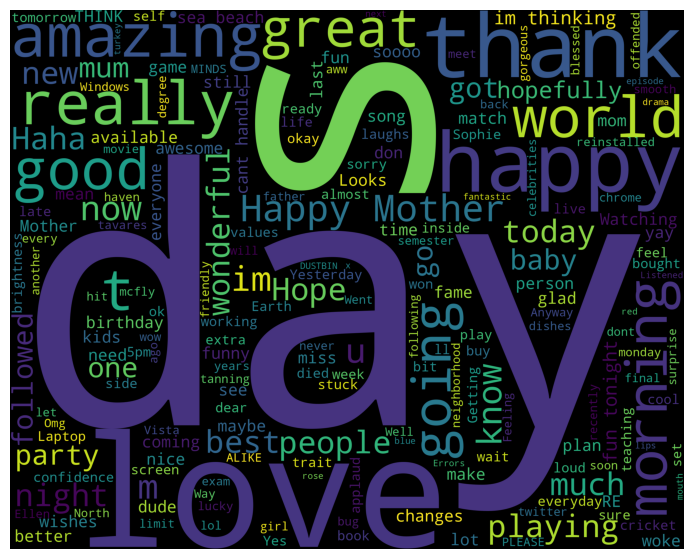

Negative words


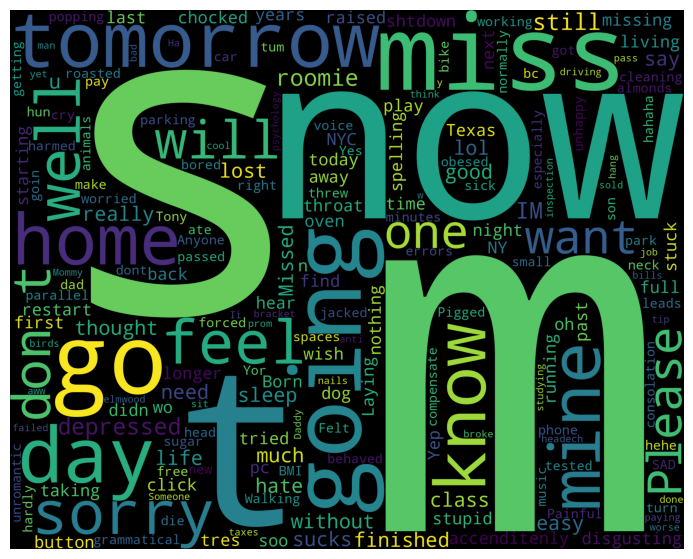

In [104]:
def wordcloud_draw(data,color = 'black'):
  words = ' '.join(data)
  cleaned_word = " ".join([word for word in words.split() if 'http'not in word and not word.startswith('@') and not word.startswith('#') and word != 'RT'])
  wordcloud = WordCloud(stopwords = STOPWORDS,background_color = color,width = 2500,height = 2000).generate(cleaned_word)
  plt.figure(1,figsize = (10,7))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()
print('Positive words')
wordcloud_draw(train_positive,'black')
print('Negative words')
wordcloud_draw(train_negative)

# Train Data

In [105]:
 import nltk
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [106]:
# Modify the loop to include the sentiment
feedback=[]
stopwords_set=set(stopwords.words('english'))
for index,row in train.iterrows():
  words_filtered=[e.lower() for e in row.text.split() if len(e)>=3]
  words_cleaned=[word for word in words_filtered if 'http' not in word and not word.startswith('@') and not word.startswith('#')]
  words=row.text.split()
  processed_words = [] # Create a new list for words after stopword removal
  for word in words:
    word=word.lower()
    if word not in stopwords_set:
      processed_words.append(word) # Append to the new list

  # Append a tuple of (words, sentiment) to feedback
  feedback.append((processed_words, row['sentiment']))


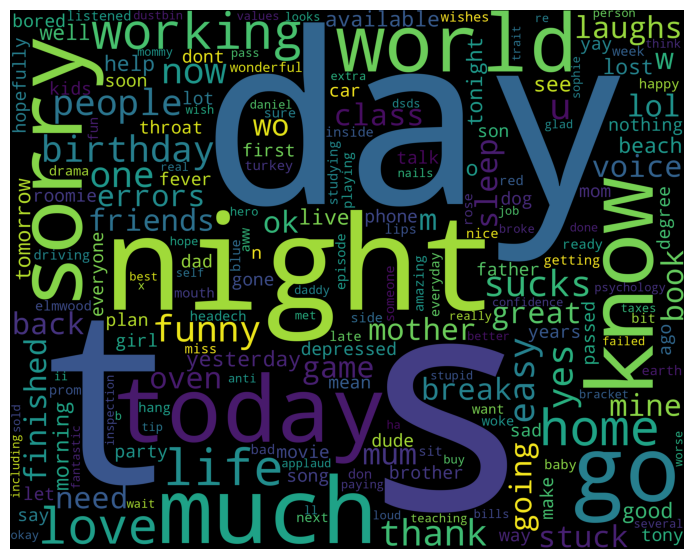

In [107]:
# Keep the rest of the code that defines get_words_in_feedback, get_word_features, and extract_features
def get_words_in_feedback(feedback):
  all=[]
  for (words,sentiment) in feedback:
    all.extend(words)
  return all

def get_word_features(wordlist):
  wordlist=nltk.FreqDist(wordlist)
  features=wordlist.keys()
  return features

w_features=get_word_features(get_words_in_feedback(feedback))

def extract_features(document):
  document_words=set(document)
  features={}
  for word in w_features:
    features['contains(%s)' % word]=(word in document_words)
  return features

# Now this should work as w_features will not be empty
wordcloud_draw(w_features)

In [108]:
#using Naive Bayes classifier
training_set=nltk.classify.apply_features(extract_features,feedback)
classifier=nltk.NaiveBayesClassifier.train(training_set)

In [109]:
negative_count=0
positive_count=0
for object in train_negative:
  res=classifier.classify(extract_features(object.split()))
  if(res=='negative'):
    negative_count=negative_count+1
for object in train_positive:
  res=classifier.classify(extract_features(object.split()))
  if(res=='positive'):
    positive_count=positive_count+1
print('Negative count: %s/%s'%(len(train_negative),negative_count))
print('positive count %s/%s'%(len(train_positive),positive_count))

Negative count: 98/92
positive count 132/132


# Test Data

In [110]:
test_positive=test[test['sentiment']=='positive']
test_positive=test_positive['text']
test_negative=test[test['sentiment']=='negative']
test_negative=test_negative['text']

In [111]:
test_positive

,text
231,"Screw the reviews, I thought Wolverine was awe..."
322,"Before I get too distracted, I`d like to thank..."
9,Today first time I arrive in the boat. Its ama...
261,writing report cards soooo tired but what an ...
192,"it makes me happy to hear a girl talk, or twe..."
101,My semester final exam is complete. Hurray!!!
407,"yep infact she is popular, miss india 99, tal..."
30,How looks like our company new logo?
137,Congratulation for your achievement
266,hope he is ok!


In [112]:
test_negative

,text
425,"Si, no bueno I guess I just don`t entertain ..."
55,I AM SUCH A CREEPER I feel disappointed becau...
104,i`m soooooo sleeeeepy!!! the last day o` schoo...
454,Still jealous
93,I'm in the village now and there hardly found ...
482,Here`s a brief preview: OMG James is creepy ...
68,Don't angry me
2,Don't angry me
79,i want to go to music tonight but i lost my vo...
439,Ok ... the passengers ... no one is alive ... ...


In [113]:
negative_count=0
positive_count=0
for object in test_negative:
  res=classifier.classify(extract_features(object.split()))
  if(res=='negative'):
    negative_count=negative_count+1
for object in test_positive:
  res=classifier.classify(extract_features(object.split()))
  if(res=='positive'):
    positive_count=positive_count+1
print('Negative count: %s/%s'%(len(test_negative),negative_count))
print('positive count %s/%s'%(len(test_positive),positive_count))

Negative count: 36/10
positive count 34/30
